In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from knn_weights import *
from matplotlib.colors import ListedColormap

from space_metric import *
from knn_plot import *
from knn_tests import *

import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from pandas.plotting import scatter_matrix
import seaborn as sns

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
iris = datasets.load_iris()

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     Species  
0          0

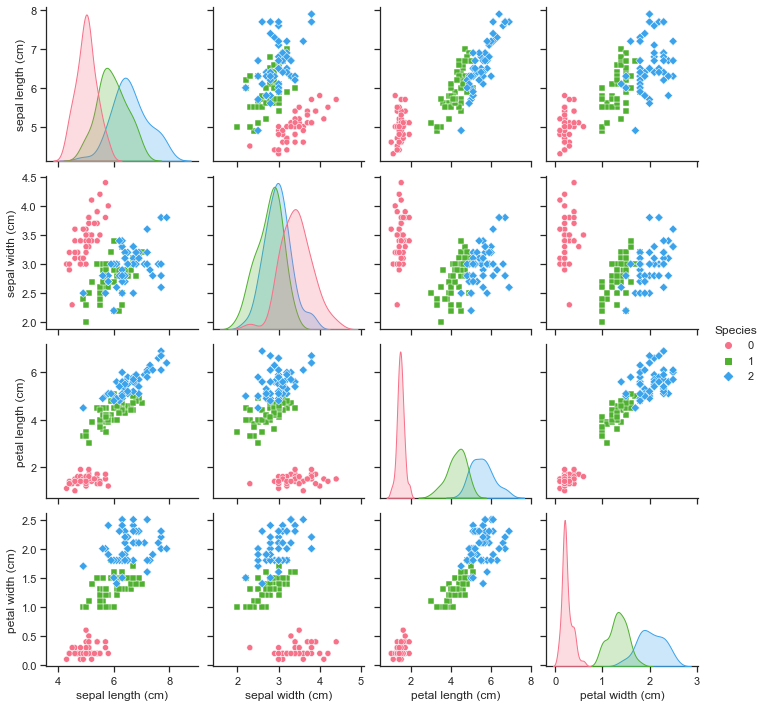

In [7]:
plt.rcParams['figure.figsize'] = [15, 15]

dataframe = pd.DataFrame(iris['data'], columns=iris['feature_names'])
dataframe['Species'] = iris['target']
print(dataframe)

sns.set(style="ticks", color_codes=True)
sns.pairplot(dataframe, hue= 'Species', palette=sns.color_palette("husl", 3), markers=["o", "s", "D"])

Загружаем 2 фичи

In [85]:
X = iris.data[:, :2]
y = iris.target

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

metric = get_dst_metric(2)
kernel = epanchinkow_window
k = 10

Точность да данных "как есть"

In [87]:
print('accuracy: ', measure_accuracy(X_test, y_test, X_train, y_train, k, metric, kernel))

accuracy:  0.85


Теперь попробуем выкинуть лишние точки 

In [88]:
weights = remove_redundant_points(X_train, y_train, k, metric, kernel, 20)
non_zero_ids = [i for i in np.arange(weights.shape[0]) if weights[i] > 0]

reduced_x = X_train[non_zero_ids]
reduced_y = y_train[non_zero_ids]

In [89]:
print(weights[non_zero_ids])

[ 1.  1.  1.  2.  1.  1.  4. 15. 19. 18.  2.  3.  1.  2. 19. 20.  2.  6.
 20. 20. 18.  5. 20.  1. 20. 19.  1.  3.  6. 18. 20. 11.  2. 17.  4.  1.
  2.  2.  7. 20. 15. 16.  6.  1. 19. 13. 16.  1.  5.  1.  1.]


Какова точность на тех данных по "выжившим" точкам?

In [90]:
print('accuracy after: ', measure_accuracy(X_test, y_test, reduced_x, reduced_y, k, metric, kernel))

accuracy after:  0.7166666666666667


Как выглядели данные на всё пространсве до отсечения "мусора"

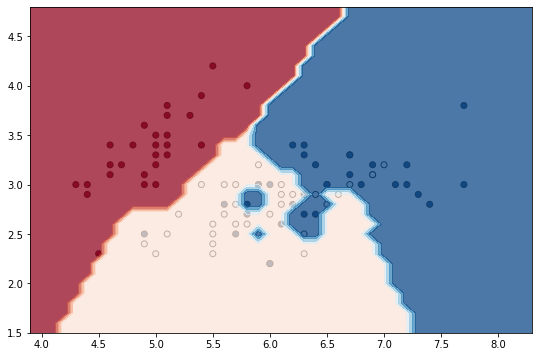

In [91]:
plt.rcParams['figure.figsize'] = [9, 6]

plot_map(X_test, y_test, X_train, y_train,  k, metric, kernel)
plt.show()

А после отсечения?

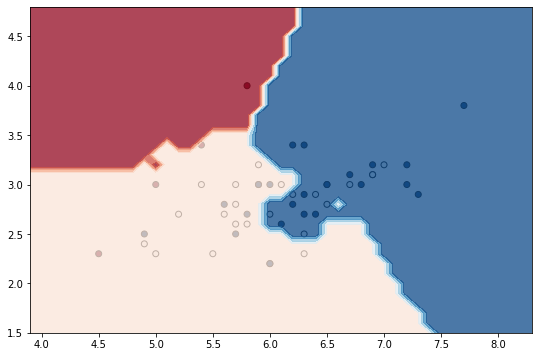

In [92]:
plot_map(X_test, y_test, reduced_x, reduced_y,  k, metric, kernel)
plt.show()

In [93]:
print('accuracy after: ', measure_accuracy(X_train, y_train, reduced_x, reduced_y, k, metric, kernel))

accuracy after:  0.6666666666666666


Прогоним классификатор на тесте и выведем правильные и ошибочные предсказания

In [94]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5

In [114]:
test_predictions = predict_array(X_test, X_train, y_train, k, metric, kernel)
predictions_mask = (test_predictions == y_test)
correct_predictions_ids = [i for i in range(predictions_mask.shape[0]) if predictions_mask[i]]
wrong_predictions_ids = [i for i in range(predictions_mask.shape[0]) if not predictions_mask[i]]

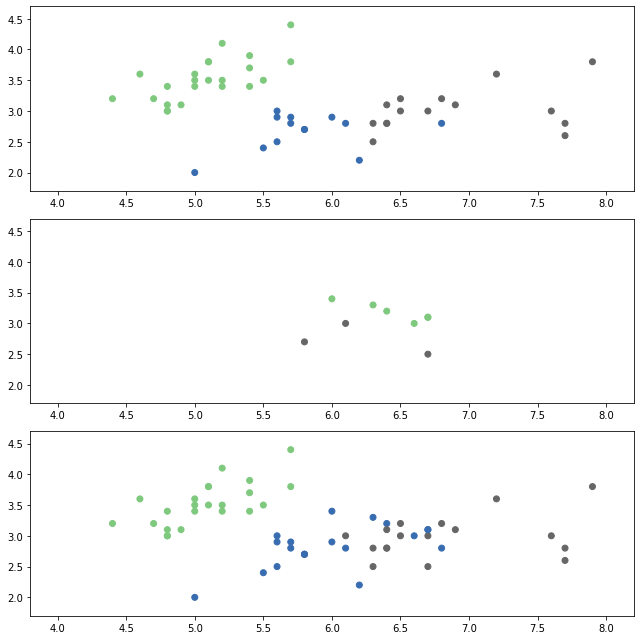

In [115]:
plt.rcParams['figure.figsize'] = [9, 9]

cm = plt.get_cmap('Accent')

ax1 = plt.subplot(3, 1, 1)
ax2 = plt.subplot(3, 1, 2)
ax3 = plt.subplot(3, 1, 3)

ax1.scatter(X_test[correct_predictions_ids, 0], X_test[correct_predictions_ids, 1], c=y_test[correct_predictions_ids], cmap=cm)

ax2.scatter(X_test[wrong_predictions_ids, 0], X_test[wrong_predictions_ids, 1], c=y_test[wrong_predictions_ids], cmap=cm)

ax3.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm)

set_ax_lims([ax1, ax2, ax3], [x_min, x_max], [y_min, y_max])

plt.tight_layout()
plt.show()


In [118]:
measure_knn(iris, 2, 10, get_dst_metric(2), triangular_window, 0.4)

accuracy:  0.7833333333333333
accuracy after weights:  0.5
accuracy after:  0.5833333333333334


In [136]:
best_accuracy, best_features, best_k, best_metric, best_kernel = knn_grid_search(iris, [2, 3, 4], [4, 6, 8, 10, 12, 14, 16],
                                                                [get_dst_metric(2), get_dst_metric(3), get_dst_metric(4)],
                                                                [triangular_window, epanchinkow_window, gauss_window], 
                                                                0.4, 39)

print('best accuracy: ', best_accuracy, 'k: ', best_k, 'metric: ', str(best_metric), 'kernel: ', str(best_kernel))

best accuracy:  0.9666666666666667 k:  10 metric:  functools.partial(<function minkowski_dist at 0x00000192BDB74790>, n=3) kernel:  <function gauss_window at 0x00000192B5F8D4C0>


In [6]:
X = iris.data[:, :]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

metric = get_dst_metric(2)
kernel = epanchinkow_window
k = 10

In [7]:
print('accuracy: ', measure_accuracy(X_test, y_test, X_train, y_train, k, metric, kernel))

accuracy:  0.9833333333333333


In [8]:
weights = remove_redundant_points(X_train, y_train, k, metric, kernel, 20)
non_zero_ids = [i for i in np.arange(weights.shape[0]) if weights[i] > 0]

reduced_x = X_train[non_zero_ids]
reduced_y = y_train[non_zero_ids]

In [9]:
print('accuracy after: ', measure_accuracy(X_test, y_test, reduced_x, reduced_y, k, metric, kernel))

accuracy after:  0.6166666666666667
